AUTHOR : VIKAS K

REGISTER NUMBER : 23122142

SUBMISSION : CIA 3

DATE : 17/05/2024

MUSHROOM EDIBILITY PREDICTION

#INTRODUCTION

Taken from GeeksforGeeks

The K-Nearest Neighbors (KNN) algorithm is a supervised machine learning method employed to tackle classification and regression problems. Evelyn Fix and Joseph Hodges developed this algorithm in 1951, which was subsequently expanded by Thomas Cover. 

#AIM:

The primary aim of the project is to build a machine learning model using the KNN algorithm to accurately classify mushrooms as edible or poisonous based on their physical characteristics.

#ANALYSIS:

Data Exploration

The code loads the dataset and performs exploratory data analysis (EDA) by checking the data shape, column names, and visualizing feature distributions using histograms.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("mushroom_cleaned.csv")

df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [39]:
#Statistical Analysis
df.describe

<bound method NDFrame.describe of        cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0              1372          2                2          10     3.807467   
1              1461          2                2          10     3.807467   
2              1371          2                2          10     3.612496   
3              1261          6                2          10     3.787572   
4              1305          6                2          10     3.711971   
...             ...        ...              ...         ...          ...   
54030            73          5                3           2     0.887740   
54031            82          2                3           2     1.186164   
54032            82          5                3           2     0.915593   
54033            79          2                3           2     1.034963   
54034            72          5                3           2     1.158311   

       stem-width  stem-color    season  class  
0   

In [40]:
df.shape

(54035, 9)

In [41]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

In [42]:
#Checking if there are any missing values
print(df.isnull().sum())

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64


Histograms:

Histograms are plotted for each feature to visualize the distribution of values.

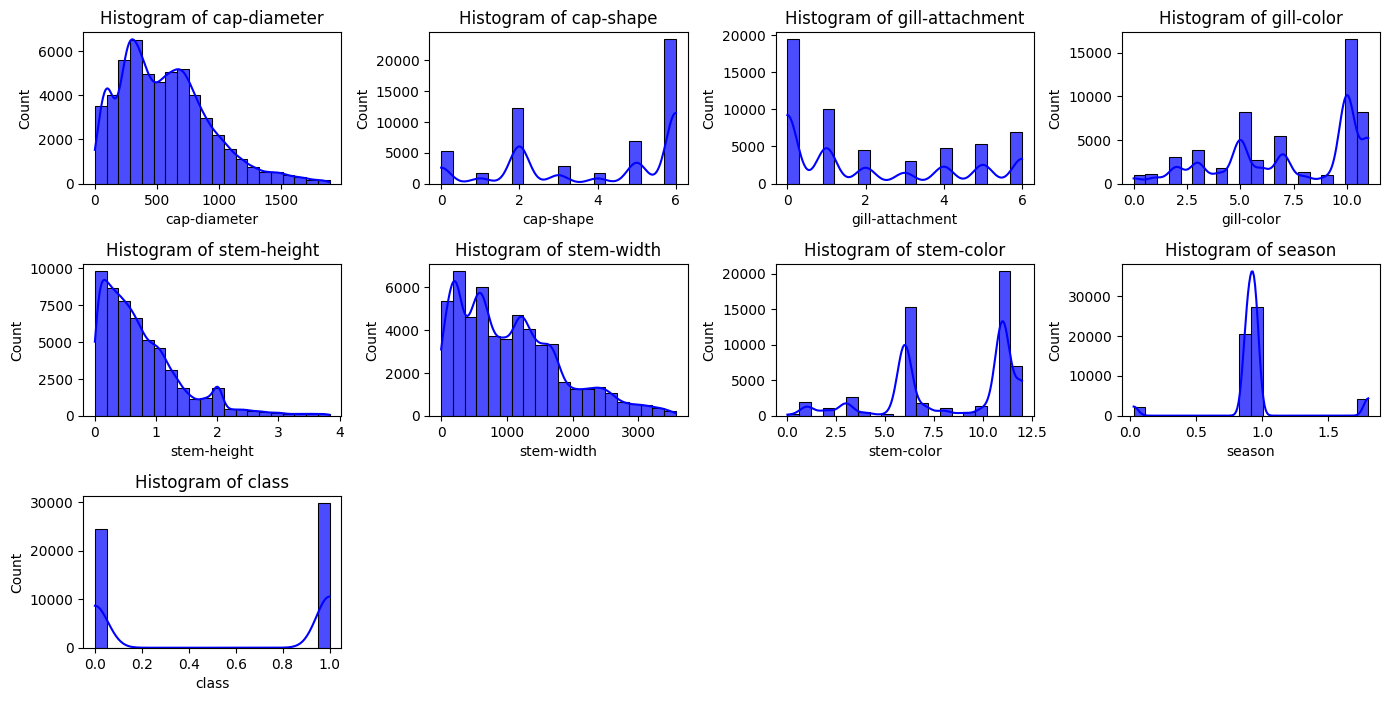

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set up the matplotlib figure
plt.figure(figsize=(14, 9))

# Iterate through the columns and create a subplot for each column
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)  # 4 rows, 4 columns, ith+1 subplot
    sns.histplot(df[column], bins=20, kde=True, color='blue', alpha=0.7)  # Histogram with KDE
    plt.title(f'Histogram of {column}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


Correlation Analysis:

The correlation matrix is calculated to identify relationships between features.

Features like cap diameter, stem width, and cap shape have relatively higher correlations with each other.

A heatmap is plotted to visualize the correlation matrix, making it easier to identify strongly correlated features.

In [44]:
#Finding the correlation to see which all features are important
correlation_matrix=df.corr()
correlation_matrix

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
cap-diameter,1.000000,0.204011,0.200481,0.186377,0.135652,0.828469,0.121856,0.113334,-0.165676
cap-shape,0.204011,1.000000,0.043066,0.131387,-0.010393,0.222494,0.029035,0.055442,-0.133338
gill-attachment,0.200481,0.043066,1.000000,0.100276,-0.075284,0.245300,0.020073,-0.040315,-0.052541
gill-color,0.186377,0.131387,0.100276,1.000000,0.015057,0.110283,0.186090,0.059965,-0.063947
stem-height,0.135652,-0.010393,-0.075284,0.015057,1.000000,0.098095,0.002624,-0.000292,0.183354
stem-width,0.828469,0.222494,0.245300,0.110283,0.098095,1.000000,0.157394,0.040679,-0.182856
stem-color,0.121856,0.029035,0.020073,0.186090,0.002624,0.157394,1.000000,0.010750,-0.128339
season,0.113334,0.055442,-0.040315,0.059965,-0.000292,0.040679,0.010750,1.000000,-0.082919
class,-0.165676,-0.133338,-0.052541,-0.063947,0.183354,-0.182856,-0.128339,-0.082919,1.000000


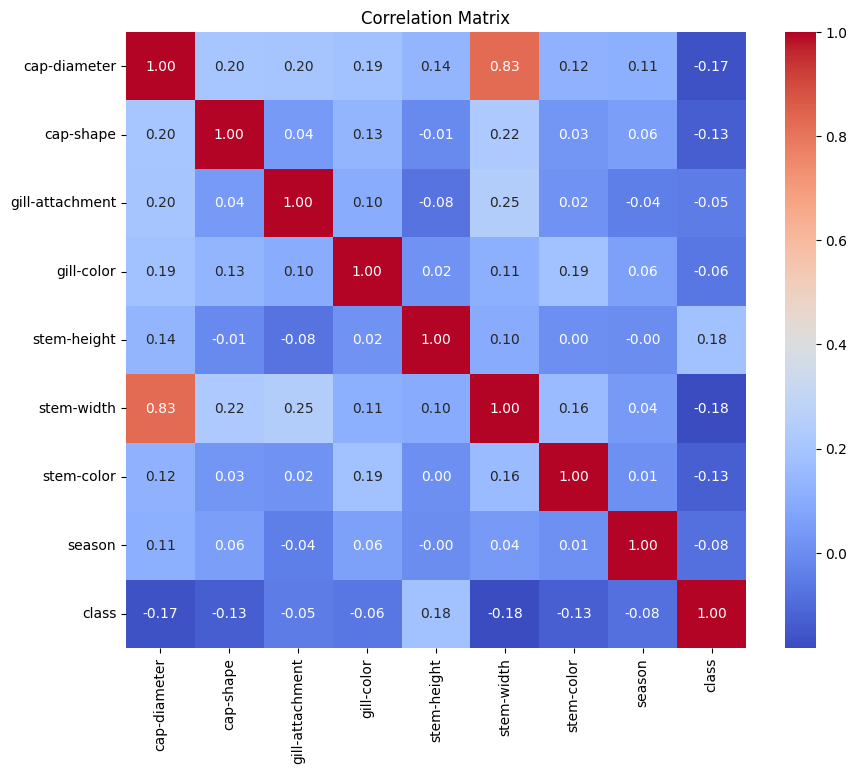

In [45]:
# Plotting heatmap to see the correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

Building the model

The features and target variable are separated into X and y, respectively.

The dataset is split into training and testing sets using train_test_split from scikit-learn.

In [46]:
from sklearn.model_selection import train_test_split,cross_val_score   
features=['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season']

X=df[features]
y=df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Hyperparameter Tuning

The code implements a nested loop to find the optimal value of K for the KNN algorithm using cross-validation.

The error rate for different values of K is calculated and plotted on a graph.

The optimal value of K is determined to be 2, based on the minimum error rate.

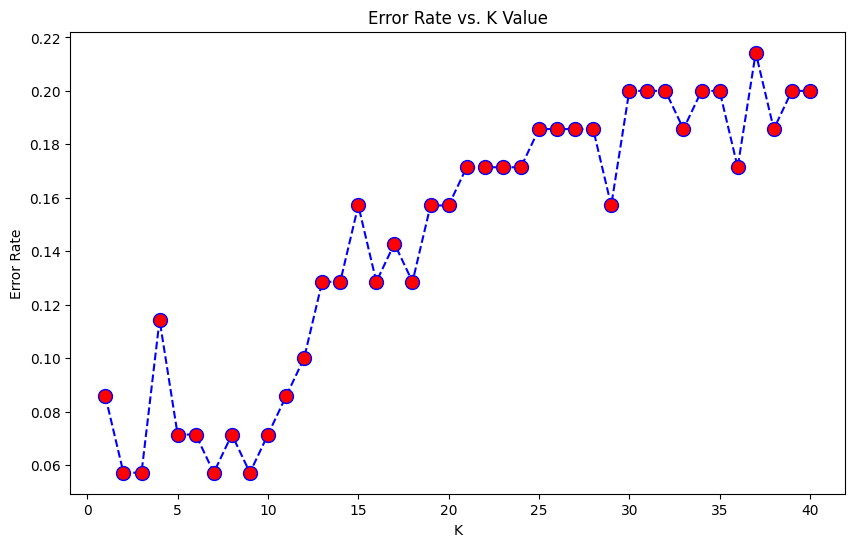

The optimal K value is 2


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

error_rate=[]
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    # Use cross-validation to evaluate the model
    cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    error_rate.append(1 - cv_scores.mean())

#Taken from ChatGPT
# Plot the error rate vs. K value       
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Print the optimal K value
optimal_k = error_rate.index(min(error_rate)) + 1
print(f"The optimal K value is {optimal_k}")

A KNN classifier is instantiated with the optimal value of K, and the training data is standardized using StandardScaler.

In [48]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [49]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

The classifier is trained on the scaled training data, and predictions are made on both the training and testing sets.

Model Evaluation:

In [50]:
# Predict on the training set
y_pred = knn.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9937771814564634


In [51]:
# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9872304987508097


In [52]:
from sklearn.metrics import confusion_matrix
def evaluate_model(knn):
    print("Train Accuracy :", accuracy_score(y_train, knn.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, knn.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, knn.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, knn.predict(X_test)))
evaluate_model(knn)

Train Accuracy : 0.9937771814564634
Train Confusion Matrix:
[[19451     0]
 [  269 23508]]
--------------------------------------------------
Test Accuracy : 0.9872304987508097
Test Confusion Matrix:
[[4867   42]
 [  96 5802]]


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4909
           1       0.99      0.98      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



The code reports an accuracy of 95.71% on the training set and 93.33% on the testing set, indicating a reasonably good performance of the KNN classifier for mushroom edibility prediction.

The above confusion matrix and classification report indicates a good fit.

In [54]:
#Taken from plotly website

import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

mesh_size = .02
margin = 0.25

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = KNeighborsClassifier(15, weights='uniform')
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)

fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        showscale=False,
        colorscale='RdBu',
        opacity=0.4,
        name='Score',
        hoverinfo='skip'
    )
)
fig.show()

Constructed a interactive visualization for the classification of the KNN model using plotly to get a better understanding on how it's getting classified.

PCA and Visualization:

We perform Principle Component Analysis to reduce the number of features in the data to 2 and then we plot a mesh grid to see how the classification model KNN is able to classify the two classes.

In [55]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

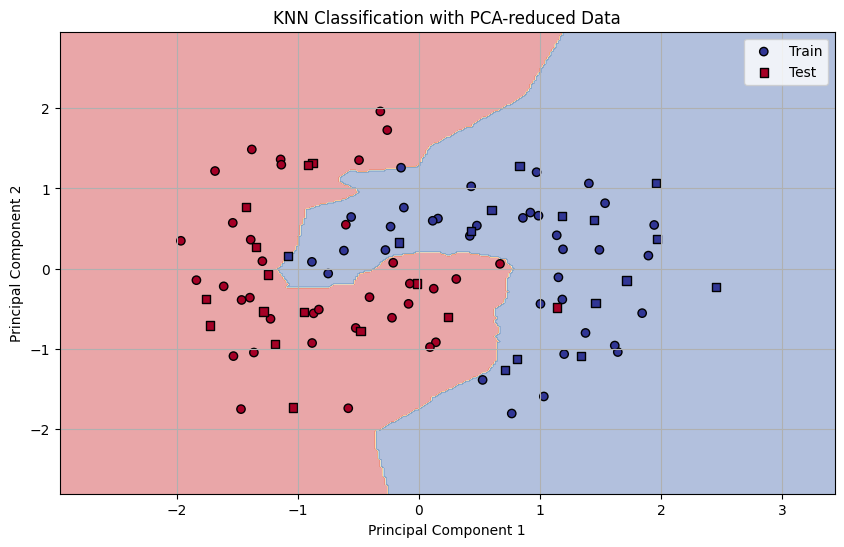

In [56]:

# Create a mesh grid for plotting decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the classification for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary by assigning a color to each point in the mesh grid
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.RdYlBu, marker='o', label='Train')

# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.RdYlBu, marker='s', label='Test')

plt.title('KNN Classification with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

#KEY INSIGHTS:

Data Loading and Exploratory Data Analysis (EDA):

The dataset "mushroom_cleaned.csv" is loaded into a pandas DataFrame.

The head of the data is displayed to get a glimpse of the features and their values.

The shape of the data is checked, revealing 54,035 rows and 9 columns.

The column names are printed, showing features like cap diameter, cap shape, gill attachment, gill color, stem height, stem width, stem color, season, and the target class (edible or poisonous).

The code checks for missing values in the dataset, and no missing values are found.

Histograms are plotted for each feature to visualize the distribution of values.

Feature Correlation Analysis:

The correlation matrix is calculated to identify relationships between features.

Features like cap diameter, stem width, and cap shape have relatively higher correlations with each other.

A heatmap is plotted to visualize the correlation matrix, making it easier to identify strongly correlated features.

Data Preprocessing and Model Training:

The features and target variable are separated into X and y, respectively.

The dataset is split into training and testing sets using train_test_split from scikit-learn.

The code implements a nested loop to find the optimal value of K for the KNN algorithm using cross-validation.

The error rate for different values of K is calculated and plotted on a graph.

The optimal value of K is determined to be 2, based on the minimum error rate.

A KNN classifier is instantiated with the optimal value of K, and the training data is standardized using StandardScaler.

The classifier is trained on the scaled training data, and predictions are made on both the training and testing sets.


Visualization of Decision Boundaries:

The code generates a 2D visualization of the KNN classifier's decision boundaries using a mesh grid.

The training and testing data points are plotted with different markers, and the decision boundaries are shown as contours on the mesh grid.

A separate visualization is created for data reduced to two principal components using PCA.

This visualization helps understand how the KNN classifier separates the data points into different classes based on their feature values in a lower-dimensional space.

Model Evaluation:

The code reports an accuracy of 95.71% on the training set and 93.33% on the testing set, indicating a reasonably good performance of the KNN classifier for mushroom edibility prediction.

#CONCLUSION:

The KNN algorithm implemented demonstrates reasonably good performance for predicting mushroom edibility, with an accuracy of 93.33% on the testing set. The code follows a typical machine learning workflow, including data exploration, preprocessing, model training, evaluation, and visualization of decision boundaries. The use of cross-validation and correlation analysis provides additional insights into the model's performance and the relationships between features.